# Clasificador paisajes
Para este ejercicio vas a crear un clasificador automático de paisajes. Los datos los encontrarás en el Classroom como `seg_train.zip` y `seg_test.zip`. Se pide:
1. Cargar las imágenes. Mira cómo están almacenados los datos. Tendrás que recorrer las carpetas, cargar las imágenes en memoria y etiquetarlas con los nombres de las carpetas. Realiza un reshape de cada imagen (comienza el ejercicio con 32x32, para ir más rápido en las ejecuciones).
2. Investiga las imágenes, comprueba con algunas muestras que has cargado bien los datos.
3. Normaliza
4. Diseña la arquitectura de la red. Recuerda que es un algiritmo de clasificación. Ojo con las dimensiones de la entrada
5. Reserva un 20% de los datos del entrenamiento para validar.
6. Representa el objeto history
7. Evalua el modelo con los datos de test
8. Representa algunos de los paisajes donde el modelo comete errores
9. Crea una matriz de confusión con los errores del modelo

**NOTA apartado 1**: para el apartado 1 tendras que recorre las carpetas/imagenes con `os.listdir()`, e ir cargando todas las imagenes como arrays de numpy

**NOTA apartado 4**: empieza con un par de capas Conv2D + MaxPooling2D con activación relu y después la fully connected layer. on softmax como ultima capa

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator, load_img
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os
import cv2

In [20]:
# IMAGE_WIDTH=32
# IMAGE_HEIGHT=32
# IMAGE_CHANNELS=3
# IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)
# BATCH_SIZE = 32
# EPOCHS = 10

## Prepare Training Data

In [2]:
class_names = ['mountain', 'street', 'glacier', 'buildings', 'sea', 'forest']

IMAGE_SIZE = (32, 32)

In [3]:
class_names_label = {class_name: i for i, class_name in enumerate(class_names)}
class_names_label

{'mountain': 0,
 'street': 1,
 'glacier': 2,
 'buildings': 3,
 'sea': 4,
 'forest': 5}

In [4]:
TRAIN_PATH = "C:\\Users\\hugom\\OneDrive\\Documents\\The Bridge_Data_Science\\Alumno\\3-Machine_Learning\\4-Deep_Learning\\2-Redes_Convolucionales\\ejercicios\\data\\seg_train"
TEST_PATH = "C:\\Users\\hugom\\OneDrive\\Documents\\The Bridge_Data_Science\\Alumno\\3-Machine_Learning\\4-Deep_Learning\\2-Redes_Convolucionales\\ejercicios\\data\\seg_test"

In [5]:
##### CODE #####

def read_data(path, im_size, class_names_label):
    X = []
    y = []

    for folder in os.listdir(path):
        label = class_names_label[folder]
        folder_path = os.path.join(path,folder)
        # Iterar sobre todo lo que haya en path
        for file in os.listdir(folder_path):
            image_path = os.path.join(folder_path,file)
            image = cv2.imread(image_path)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            image = cv2.resize(image, im_size)
            X.append(image)
            y.append(label)
    
    
    return np.array(X), np.array(y)
    

X_train, y_train = read_data(TRAIN_PATH, IMAGE_SIZE, class_names_label)
X_test, y_test = read_data(TEST_PATH, IMAGE_SIZE, class_names_label)

print(X_train.shape)
print(X_test.shape)



(14034, 32, 32, 3)
(3000, 32, 32, 3)


In [6]:
y_train

array([3, 3, 3, ..., 1, 1, 1])

In [7]:
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train, random_state=42)

In [8]:
y_train[0:10]

array([3, 1, 1, 4, 0, 2, 0, 0, 3, 1])

In [9]:
pd.DataFrame(y_train).value_counts()

0    2512
2    2404
1    2382
4    2274
5    2271
3    2191
dtype: int64

In [10]:
X_train.max()

255

street


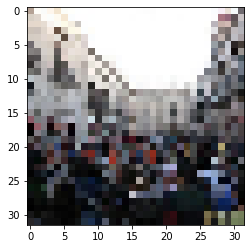

In [11]:
index = np.random.randint(X_train.shape[0])
print(class_names[y_train[index]])
plt.imshow(X_train[index]);

In [12]:
X_train_scal = X_train/255.0
X_test_scal = X_test/255.0

Diseña la arquitectura

In [13]:
import tensorflow as tf

In [14]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation="relu", input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1],3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(6, activation="softmax") #si fuera binario, sería (1, activation='sigmoide')



])

In [15]:
# 3 porque tenemos 3 capas RGB
# 32 porque hemos elegido en esta capa de convolución hacer 32 filtros
# 3*3 porque en cada filtro tenemos una matriz de 3*3
# 32 bias


3*32*3*3 + 32

896

In [16]:
32*64*3*3 + 64

18496

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 2304)              0         
                                                                 
 dense (Dense)               (None, 128)               2

In [18]:
model.compile(optimizer= 'adam', loss= "sparse_categorical_crossentropy", metrics=['accuracy'])

In [19]:
history = model.fit(X_train_scal, y_train, batch_size=128, epochs=10, validation_split=0.1)

Epoch 1/10
99/99 [==============================] - 6s 56ms/step - loss: 1.1909 - accuracy: 0.5387 - val_loss: 0.9432 - val_accuracy: 0.6567
Epoch 2/10
99/99 [==============================] - 6s 59ms/step - loss: 0.9105 - accuracy: 0.6587 - val_loss: 0.8640 - val_accuracy: 0.6588
Epoch 3/10
99/99 [==============================] - 6s 62ms/step - loss: 0.8233 - accuracy: 0.6985 - val_loss: 0.7422 - val_accuracy: 0.7293
Epoch 4/10
99/99 [==============================] - 6s 63ms/step - loss: 0.7420 - accuracy: 0.7330 - val_loss: 0.7001 - val_accuracy: 0.7528
Epoch 5/10
99/99 [==============================] - 7s 72ms/step - loss: 0.7015 - accuracy: 0.7452 - val_loss: 0.6749 - val_accuracy: 0.7585
Epoch 6/10
99/99 [==============================] - 7s 67ms/step - loss: 0.6443 - accuracy: 0.7655 - val_loss: 0.6686 - val_accuracy: 0.7635
Epoch 7/10
99/99 [==============================] - 7s 67ms/step - loss: 0.6019 - accuracy: 0.7822 - val_loss: 0.6445 - val_accuracy: 0.7806
Epoch 8/10
99

In [20]:
df_hist = pd.DataFrame(history.history)
df_hist

,loss,accuracy,val_loss,val_accuracy
0,1.190859,0.538717,0.943195,0.656695
1,0.910543,0.658749,0.863998,0.658832
2,0.823278,0.698496,0.742215,0.729345
3,0.741969,0.733017,0.700078,0.752849
4,0.701541,0.745210,0.674894,0.758547
5,0.644263,0.765479,0.668568,0.763533
6,0.601864,0.782185,0.644548,0.780627
7,0.578119,0.795962,0.680361,0.757123
8,0.540769,0.807601,0.639375,0.778490
9,0.524826,0.809343,0.623310,0.794872


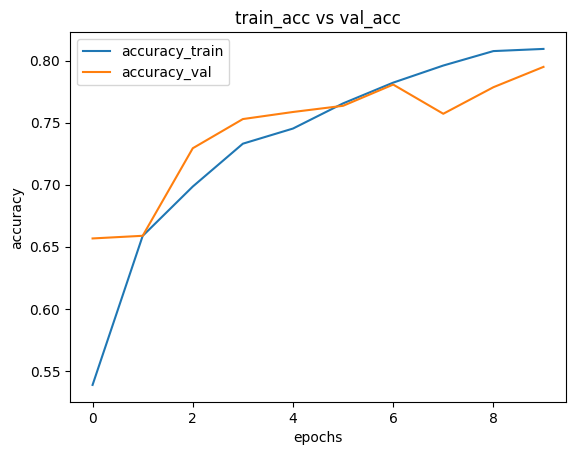

In [23]:
plt.figure()
plt.style.use('default')
plt.plot(df_hist['accuracy'], label='accuracy_train')
plt.plot(df_hist['val_accuracy'], label='accuracy_val')
plt.title('train_acc vs val_acc')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend()

In [24]:
results = model.evaluate(X_test_scal, y_test)

94/94 [==============================] - 1s 7ms/step - loss: 0.6530 - accuracy: 0.7693


In [25]:
predictions = model.predict(X_test_scal)
predictions.round(2)

array([[0.  , 0.02, 0.  , 0.97, 0.  , 0.  ],
       [0.17, 0.01, 0.3 , 0.02, 0.01, 0.48],
       [0.  , 0.31, 0.  , 0.68, 0.  , 0.  ],
       ...,
       [0.77, 0.  , 0.03, 0.  , 0.19, 0.01],
       [0.06, 0.12, 0.03, 0.5 , 0.28, 0.  ],
       [0.  , 0.75, 0.  , 0.01, 0.  , 0.23]], dtype=float32)

In [26]:
pred_labels = np.argmax(predictions, axis=1)

In [27]:
pred_labels

array([3, 5, 3, ..., 0, 3, 1], dtype=int64)

buildings


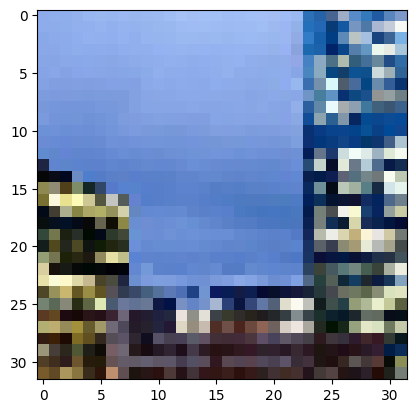

In [28]:
index=3
print(class_names[y_test[index]])
plt.style.use('default')
plt.imshow(X_test[index]);

In [29]:
class_names[pred_labels[index]]

'buildings'

In [30]:
import seaborn as sns
from sklearn.metrics import confusion_matrix


class_names_label

{'mountain': 0,
 'street': 1,
 'glacier': 2,
 'buildings': 3,
 'sea': 4,
 'forest': 5}

<AxesSubplot:>

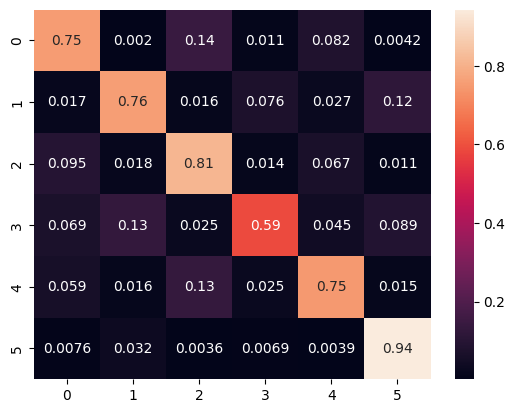

In [31]:
c_mat = confusion_matrix(y_test,pred_labels)

sns.heatmap(c_mat/np.sum(c_mat,axis=1), annot=True)